### Importing Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

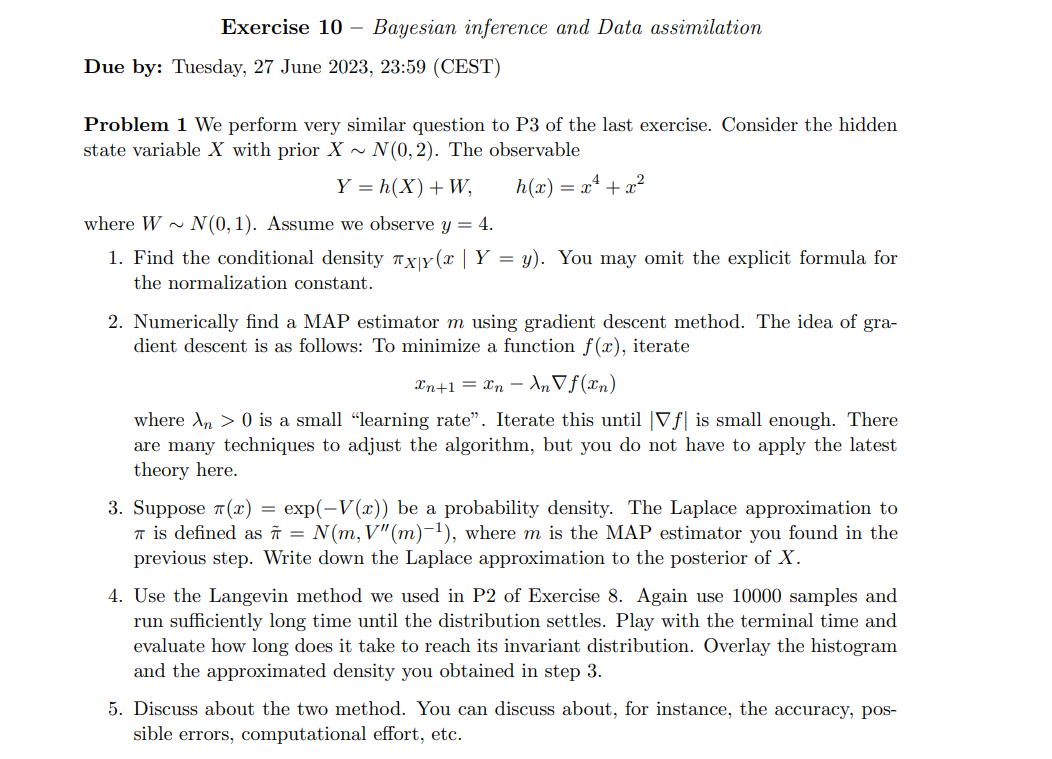

### Problem 1.1

- Given $X ~ N(0,2), W ~ (0,1)$
- $Y = h(X) + W$ ; $h(x) = x^4 + x^2$
- Conditional Mean: $E[Y|X=x] = E[h(X) + W | X = x] = E[h(x)+W] = h(x) + E[W] = h(x) = x^4+x^2$
- Conditional Var : $Var[Y|X = x] = Var[h(X) + W | X = x] = Var[W] = 1$
#### Thus $\pi_{Y|X} = \frac{e^\frac{-1*(y-x^4-x^2)^2}{2}}{\sqrt{2\pi}} $
#### Also we have $\pi_{X} = \frac{e^\frac{-1*(x)^2}{2*2}}{\sqrt{2*2\pi}}$  
#### By bayes theorem  $\pi_{X|Y=y}(x)$ is proportional to ${\pi_{Y|X=x}(y) * \pi_{X}(x)}$
#### Therefore $\pi_{X|Y=y}(x)$ is proportional to $\frac{e^\frac{y-x^4-\frac{x^2}{2}}{-2}}{\sqrt{8}\pi}$

### Problem 1.2

- Observing the MAP's via the diagram

In [2]:
def posterior_density(x,y):
    return (1/(np.sqrt(8))*(np.pi**2)) * np.exp((-1/2) * ((y-x**4-x**2)**2 + (x**2)/2))

In [3]:
x = np.linspace(-10,10,1000)
y = 4
z = posterior_density(x,y)

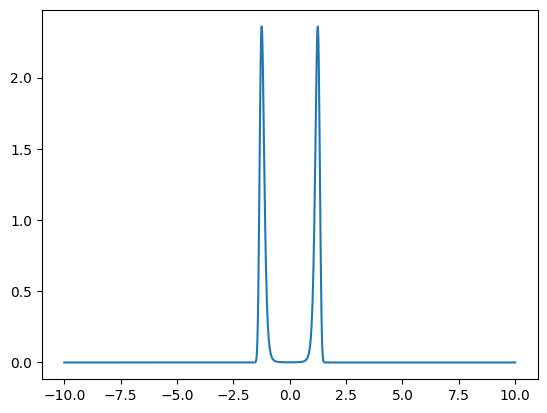

In [4]:
plt.plot(x,z)
plt.show()

In [5]:
MAP=-10+np.argmax(z)*0.02
print("Maximum a posteriori estimator: ", MAP)

Maximum a posteriori estimator:  -1.2599999999999998


In [6]:
arr = z

# Get the maximum value in the array
max_val = np.max(arr)

# Get the indices of all maximum elements
max_indices = -10 + np.where(arr == max_val)[0]*0.02

print(max_indices)

[-1.26  1.24]


- Finding the same Map's via gradient descent

In [7]:
def f(x, y):
    return -np.exp((-1/2) * ((y-x**4-x**2)**2 + (x**2)/2))

def df_dx(x, y):
    return -(1/2)*(x + 2*(y - x**4 - x**2) * (-1*4*x**3 - 2*x)) * f(x, y)

def gradient_descent(x, y, learning_rate, tolerance):
    while True:
        gradient = df_dx(x, y)
        update = learning_rate * gradient
        if np.abs(update) <= tolerance:
            break
        x -= update
    return x

# Set the initial value of x and y
x_initial_1 = -1.0
x_initial_2 = 1.0
y = 4.0

# Set the learning rate and tolerance
learning_rate = 0.1
tolerance = 1e-5

# Perform gradient descent
x_optimized_1 = gradient_descent(x_initial_1, y, learning_rate, tolerance)
x_optimized_2 = gradient_descent(x_initial_2, y, learning_rate, tolerance)

# Print the optimized value of x
print("Optimized x_1 MAP:", x_optimized_1)
print("Optimized x_2 MAP:", x_optimized_2)

Optimized x_1 MAP: -1.2436591287193384
Optimized x_2 MAP: 1.2436591287193384


### Problem 1.3
#### Since the MAP estimator are related to the posteriori distribution, we can compare the $exp(-V(x))$ with the distribution of $\pi_{X|Y}$
#### Thus we have $V(x) = \frac{(y-x^4-x^2)^2+\frac{x^2}{2}}{2}$
#### $V'(x) = (\frac{x}{2} + (y - x^4 - x^2).(-4x^3-2x))$
#### We will have $V"(x) = (1/2+(28x^6+30x^4+6x^2-2y-12x^2y))$
#### We will have 2 approximations for 2 different MAP's m values i.e. -1.272 and 1.272 with $N(m,(V''(m))^{-1})$
#### For m = 1.272 and m = -1.272, the variance is 0.0082
#### Therefore the laplace approximation for prior $\pi(x)$ are $\frac{1}{\sqrt{2\pi*0.0082}} * e^\frac{-1*(x-1.27)^2}{2*0.0082}$

In [8]:
def equation(x, y):
    return 1/(1/2 + (28*(x**6) + 30*(x**4) + 6*(x**2) - 2*y - 12*(x**2)*y))
z1 = equation(x = 1.272, y = 4)
z2 = equation(x = -1.272, y = 4)

In [9]:
z1,z2

(0.00821829439025431, 0.00821829439025431)

### Problem 1.4

In [10]:
dt = 0.01
T = 10
X = np.arange(-10, T + dt, dt)

var = 0.0082
m = 1.27
def pi(x,var,m):
    prob = (1 /np.sqrt(2*np.pi*var))*np.exp((-1/(2*var))*(x-m)**2)
    return prob

# Vectorized calculation
Y = pi(X,var,m)

In [11]:
ind_1 = np.argmax(Y)
X[ind_1]

1.2699999999997598

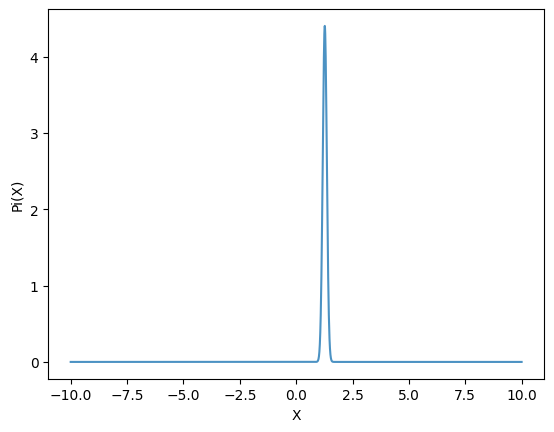

In [12]:
fig, axs = plt.subplots()
sns.lineplot(x = X,y=Y,alpha=0.8, ax = axs)
axs.set(xlabel = "X", ylabel = "Pi(X)")
plt.show()

In [13]:
def hist_plt(time_points, sim_mat, bins, alp: float):
    num_plots = len(time_points)
    num_rows = int(np.ceil(np.sqrt(num_plots)))
    num_cols = int(np.ceil(num_plots / num_rows))
    
    # Get a colormap
    cmap = plt.get_cmap('tab10')
    
    # Get the corresponding colors from the colormap
    colors = [cmap(i % 10) for i in range(len(time_points))]
    
    # Iterate over the time points and plot histograms
    fig, axs = plt.subplots(num_rows, num_cols,figsize = (20,18))
    axs = axs.ravel()
    for i, t in enumerate(time_points):
        # Get the corresponding index in T
        t_index = int(t / dt)
        # Extract the values at the given time point
        if t_index > 0:
            values = sim_mat[:, t_index - 1]
        else:
            values = sim_mat[:, t_index]
    
        # Plot histogram with the random color
        sns.histplot(values, bins=bins, kde=True, alpha=alp, label=f't = {t}', color=colors[i], ax=axs[i], stat = 'density')
    
        # Add labels and legend
        axs[i].set(xlabel='Value', ylabel='Frequency')
        axs[i].legend()
    
    # Plot the normal distribution
    samples = np.random.randn(10000)
    i = len(time_points)
    sns.histplot(samples, bins=bins, kde=True, alpha=alp, label='Normal Distribution', color=cmap(i), ax=axs[i])
    axs[i].set(ylabel='Frequency')
    axs[i].legend()
    
    plt.tight_layout()
    plt.show()


In [14]:
final_t = 100
dt = 0.01
x_n = -1
num_sim = 10_000

T = np.arange(dt, final_t, dt)
sim_mat = np.empty((num_sim, len(T) + 1), dtype='float32')
sim_mat[:, 0] = x_n

vals = sim_mat[:, 0]

for i in range(1, len(T) + 1):
    val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt
    random_nums = np.sqrt(2 * dt) * np.random.randn(num_sim)

    # Update vals with the new values for the next iteration
    vals = vals - val_tr + random_nums

    # Handle overflow errors by clipping the values
    vals = np.clip(vals, -1e10, 1e10)

    # Set the columns at the nth time step with the obtained values
    sim_mat[:, i] = vals

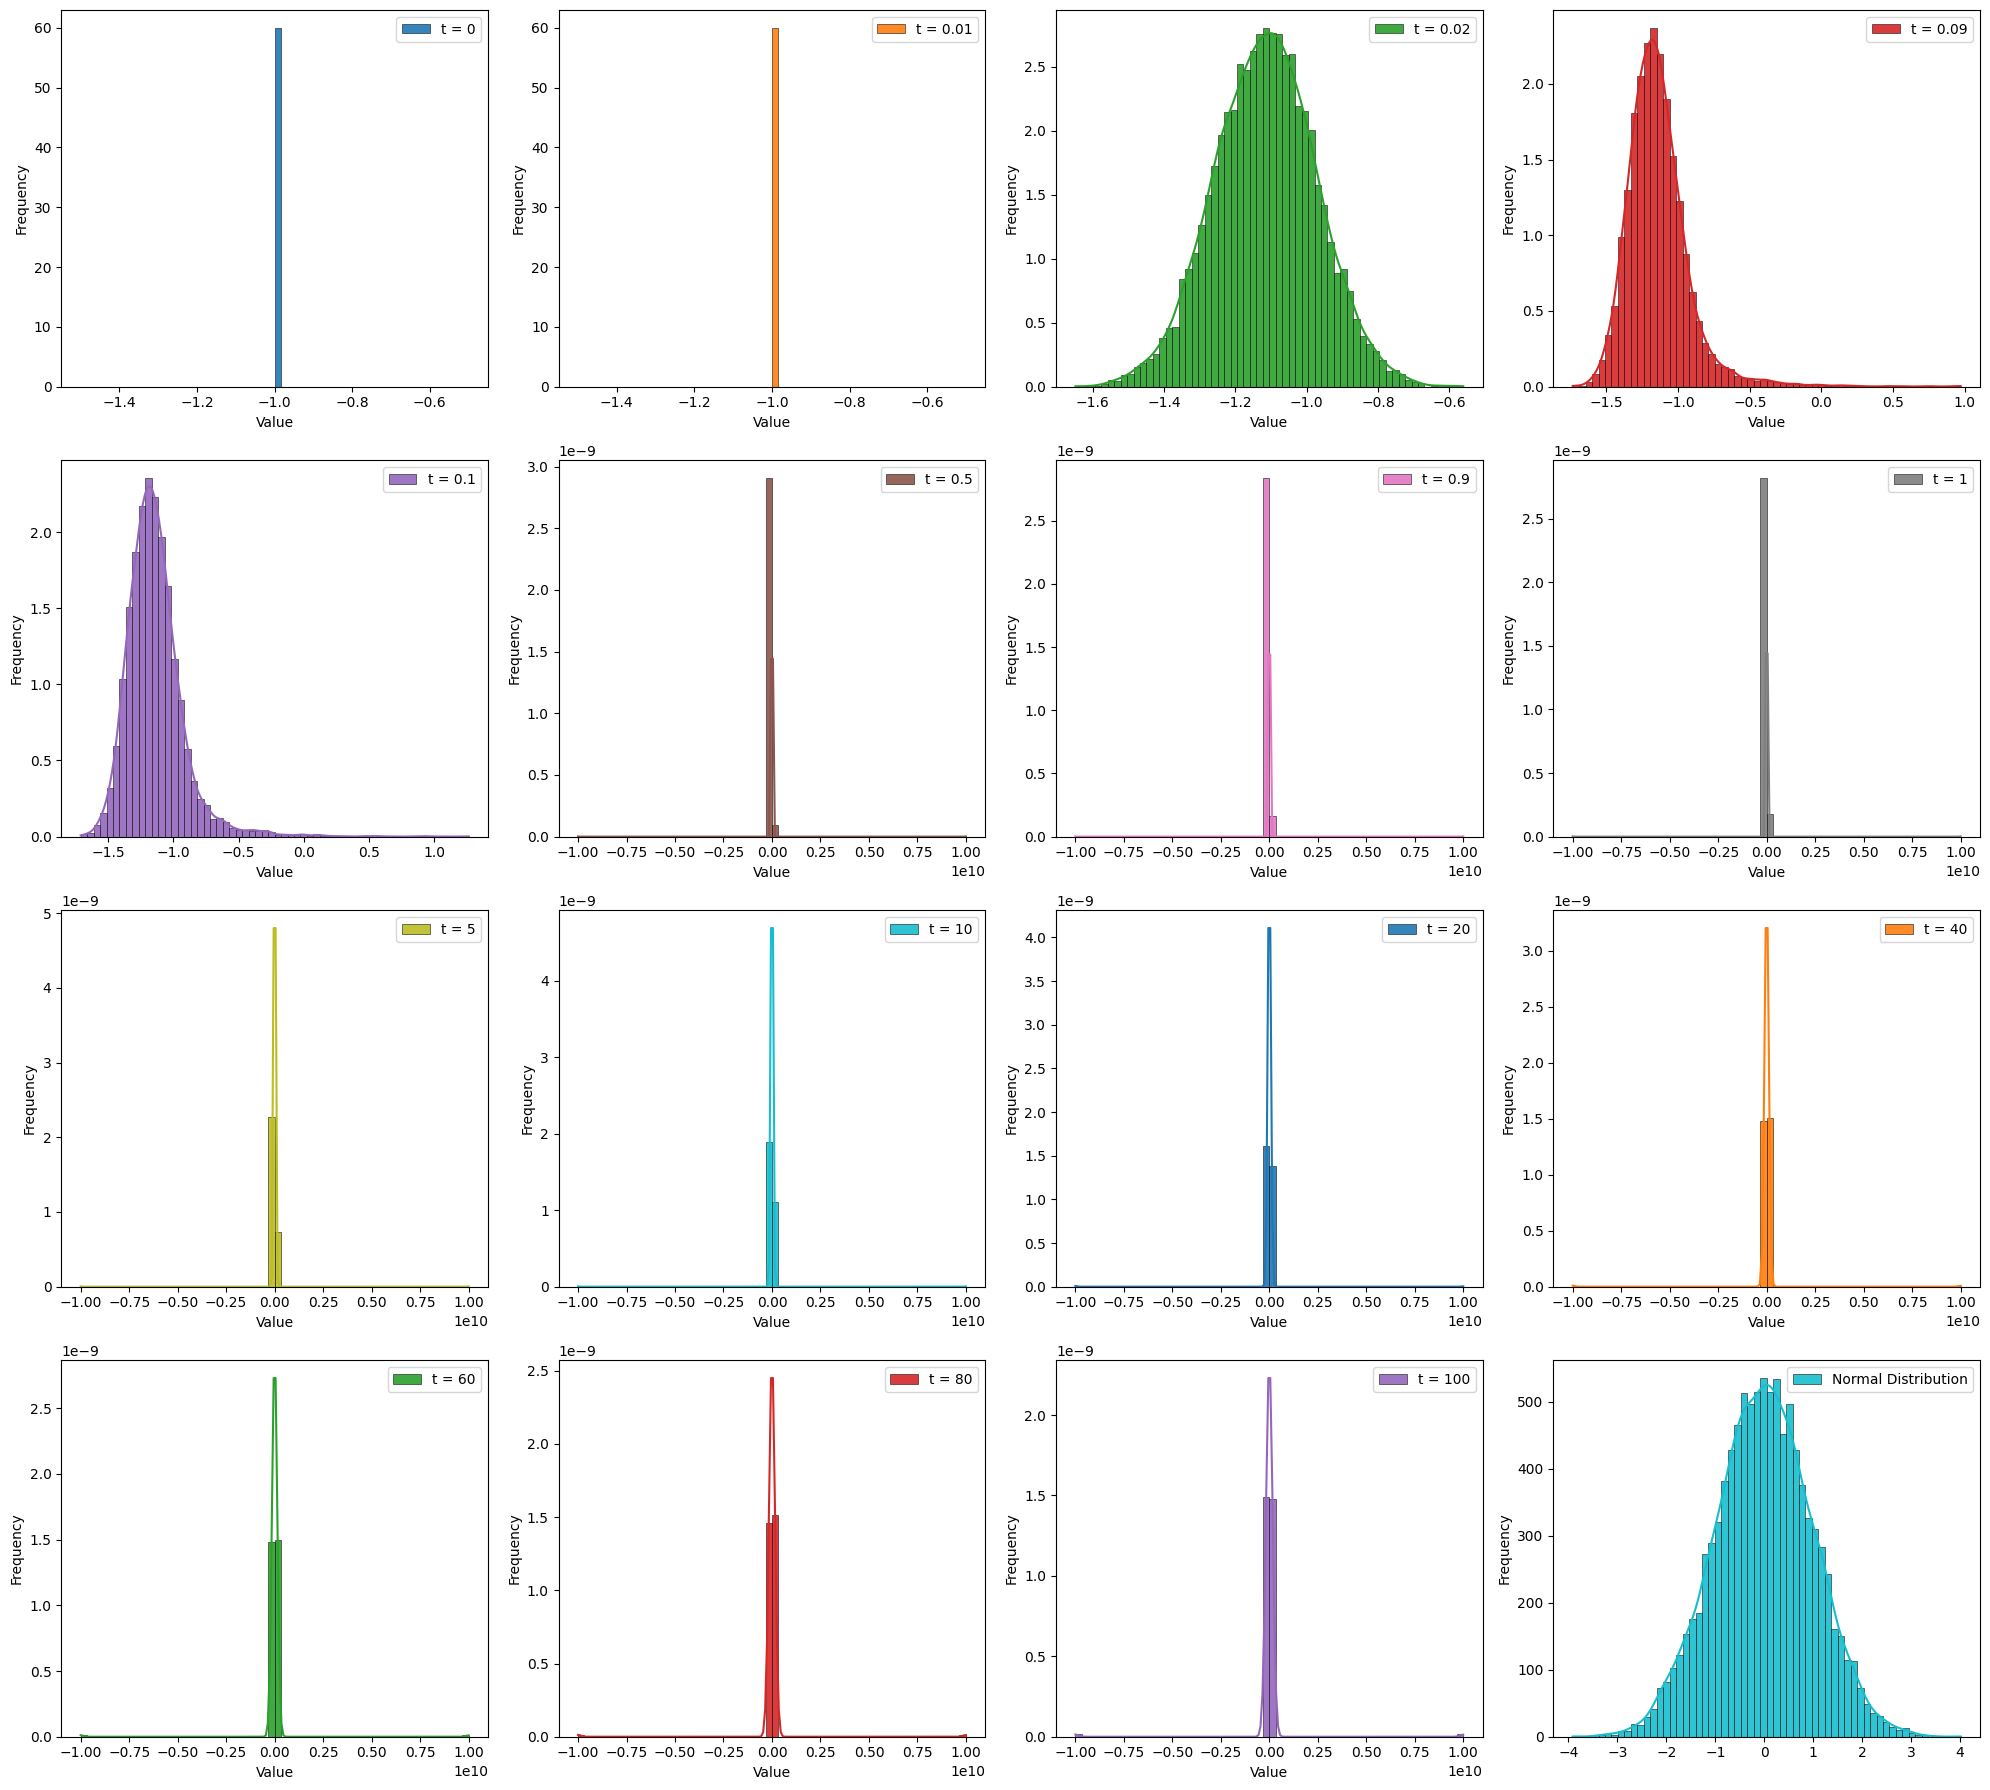

In [15]:
# If we begin at X_n = -1
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, sim_mat,60,alp=0.9)

In [16]:
final_t = 100
dt = 0.01
x_n = +1
num_sim = 10_000

T = np.arange(dt, final_t, dt)
sim_mat = np.empty((num_sim, len(T) + 1), dtype='float32')
sim_mat[:, 0] = x_n

vals = sim_mat[:, 0]

for i in range(1, len(T) + 1):
    val_tr = ((vals / 2) + (4 - vals ** 4 - vals ** 2) * (-4 * vals ** 3 - 2 * vals)) * dt
    random_nums = np.sqrt(2 * dt) * np.random.randn(num_sim)

    # Update vals with the new values for the next iteration
    vals = vals - val_tr + random_nums

    # Handle overflow errors by clipping the values
    vals = np.clip(vals, -1e10, 1e10)

    # Set the columns at the nth time step with the obtained values
    sim_mat[:, i] = vals

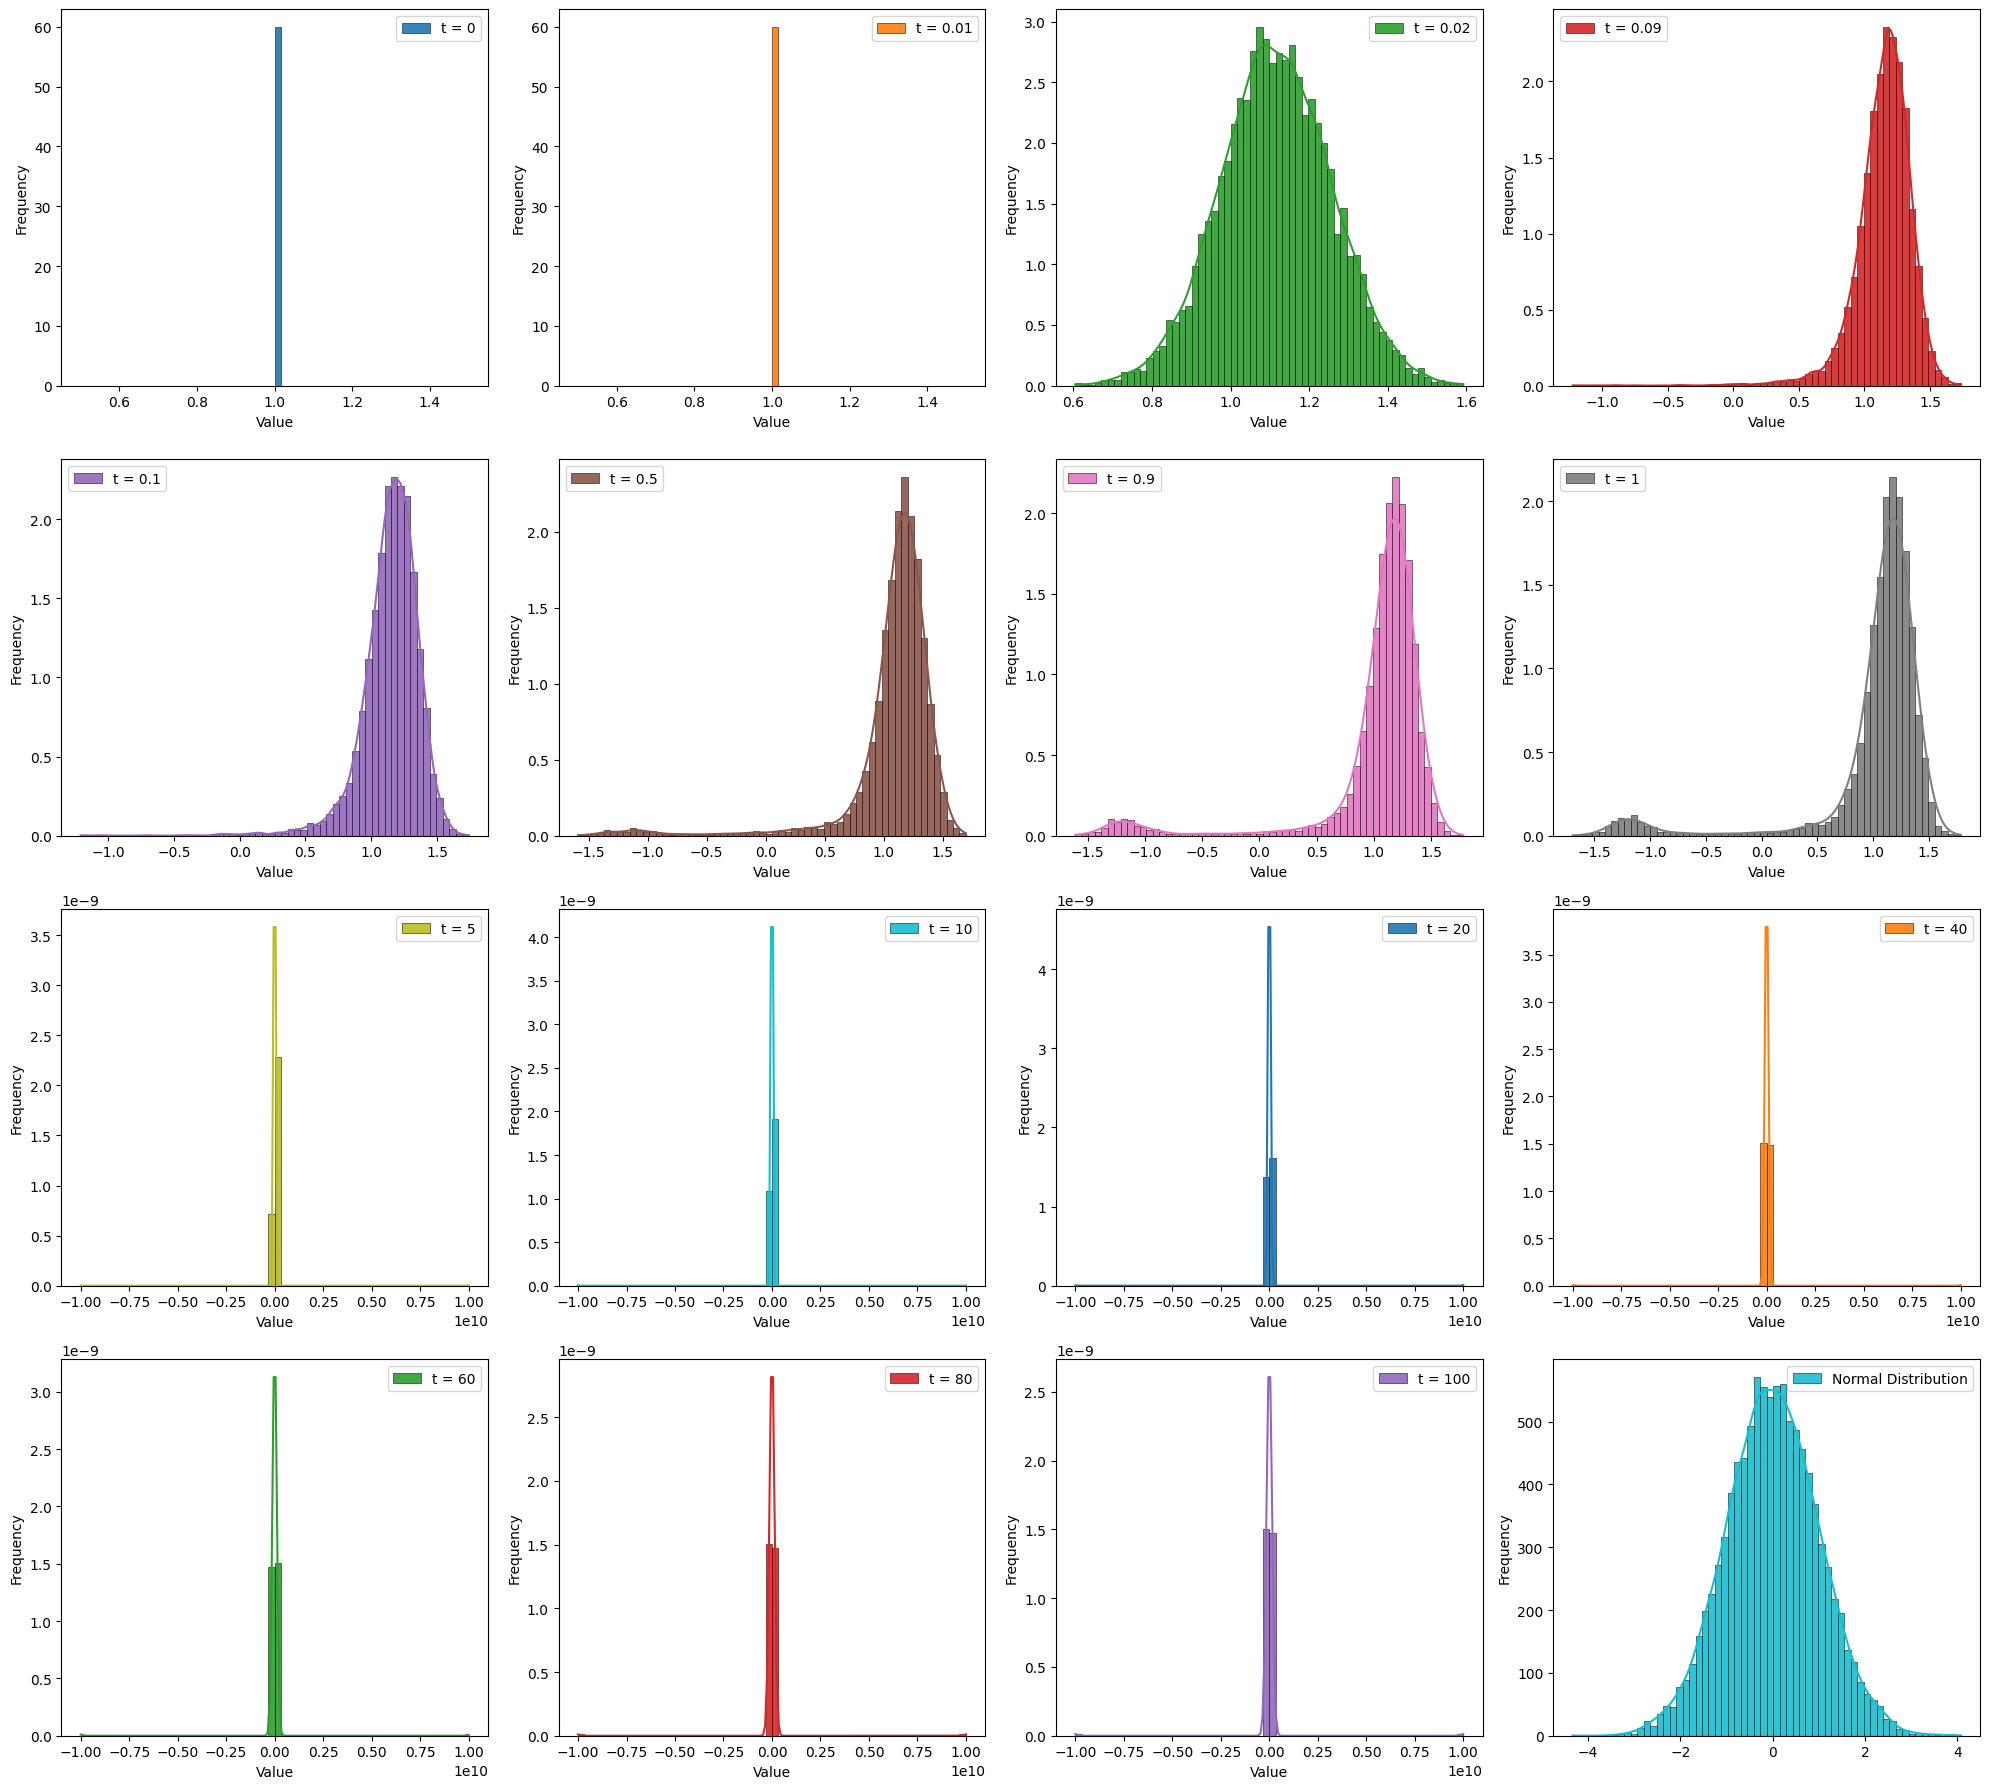

In [17]:
# If we begin at X_n = +1
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, sim_mat,60,alp=0.9)

In [24]:
index = int(100/dt)

# Assuming sim_mat[:, index-1] is your array
values = sim_mat[:, index-1]

# Define the number of desired bins (at most 60 in your case)
num_bins = min(len(np.unique(values)), 60)

# Use numpy.histogram to bin the values into the specified number of bins
hist, bin_edges = np.histogram(values, bins=num_bins)

# Print the histogram and bin edges
print("Histogram:", hist)
print("Bin Edges:", bin_edges)

Histogram: [  39    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 5001 4918    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   42]
Bin Edges: [-1.0000000e+10 -9.6666665e+09 -9.3333330e+09 -8.9999995e+09
 -8.6666670e+09 -8.3333335e+09 -8.0000000e+09 -7.6666665e+09
 -7.3333335e+09 -7.0000000e+09 -6.6666665e+09 -6.3333335e+09
 -6.0000000e+09 -5.6666665e+09 -5.3333335e+09 -5.0000000e+09
 -4.6666665e+09 -4.3333335e+09 -4.0000000e+09 -3.6666668e+09
 -3.3333332e+09 -3.0000000e+09 -2.6666668e+09 -2.3333332e+09
 -2.0000000e+09 -1.6666666e+09 -1.3333334e+09 -1.0000000e+09
 -6.6666669e+08 -3.3333334e+08  0.0000000e+00  3.3333334e+08
  6.6666669e+08  1.0000000e+09  1.3333334e+09  1.6666666e+09
  2.0000000e+09  2.3333332e+09  2.6666668e+09  3.0000000e+09
  3.3333332e+09  3.6666668e+09  4.0000000e+09  4.3333335e+09
 

In [27]:
max_freq_bin = np.argmax(hist)

# Get the corresponding bin edges
start_edge = bin_edges[max_freq_bin]
end_edge = bin_edges[max_freq_bin + 1]

# Print the bin edges with the most points
print("Bin Edges with the Most Points:", start_edge, end_edge)

Bin Edges with the Most Points: -333333340.0 0.0


### Problem 1.5

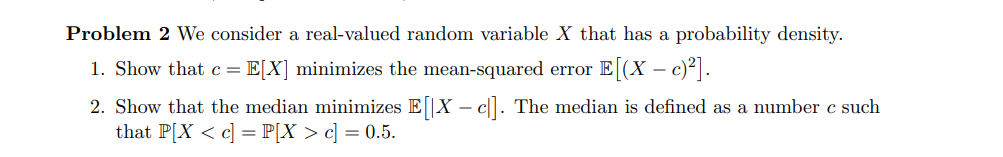

### Problem 2.1

### Problem 2.2

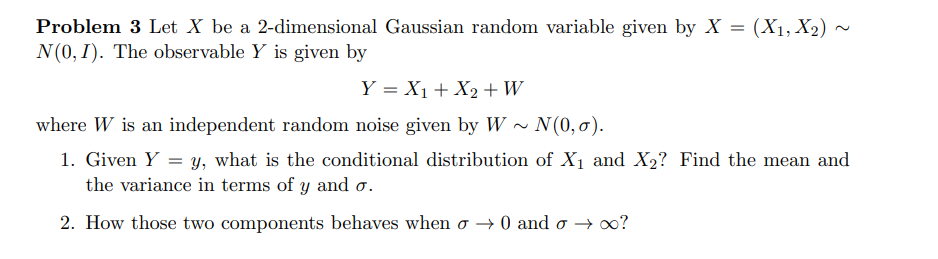